In [18]:
#NAMES: Menzel Nicholas, Pocasangre Ernesto, Gacic Dajana, Zhang Yi, Causevic Azur

import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST

In [19]:
data_folder = '/home/nao/bilhr23ss/workspace/src/tutorial_4/data/'

dataset_75 = np.loadtxt(data_folder + 'data_76_samples.txt')
X_train75 = dataset_75[:,:2]
Y_train75 = dataset_75[:,2:]

dataset_150 = np.loadtxt(data_folder + 'data_150_samples.txt')
X_train150 = dataset_150[:,:2]
Y_train150 = dataset_150[:,2:]



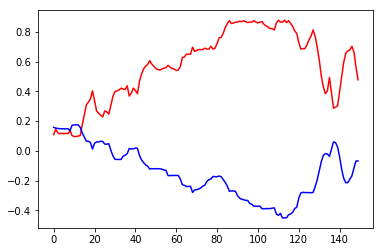

In [20]:
%matplotlib inline
plt.plot(X_train150[:,0],'r')
plt.plot(Y_train150[:,1],'b')
plt.show()

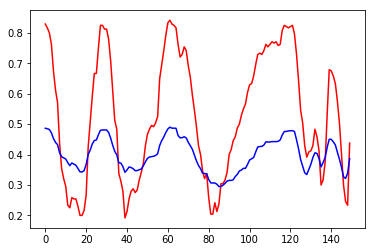

In [21]:
%matplotlib inline
plt.figure()
plt.plot(X_train150[:,1],'r')
plt.plot(Y_train150[:,0],'b')
plt.show()

In [22]:
resolution = 50
field_size = 5 # receptive field 

In [23]:
#forward and backward pass
def forward_backward_pass(x,y,field_size,learning_rate):
   

    x = np.floor(x*resolution).astype(int)

    y1_bot = np.max([x[0]-np.floor(field_size/2), 0]).astype(int)
    y1_top = np.min([x[0]+np.floor(field_size/2),49]).astype(int)
    y2_bot = np.max([x[1]-np.floor(field_size/2),0]).astype(int)
    y2_top = np.min([x[1]+np.floor(field_size/2),49]).astype(int)

    output1 = np.sum(weights[y1_bot:y1_top, y2_bot:y2_top, 0])
    output2 = np.sum(weights[y1_bot:y1_top, y2_bot:y2_top, 1])
    
    output = np.array([output1, output2])
    
    #dense implementation
    weights[y1_bot:y1_top, y2_bot:y2_top, 0] = weights[y1_bot:y1_top, y2_bot:y2_top, 0] + learning_rate*(y[0]-output1)/field_size
    weights[y1_bot:y1_top, y2_bot:y2_top, 1] = weights[y1_bot:y1_top, y2_bot:y2_top, 1] + learning_rate*(y[1]-output2)/field_size

    return output 

In [24]:
import copy
epochs = 300
lr = 0.01

# def init(x,y,z):
    
#     layer=np.random.uniform(-1.,1.,size=(x,y,z))
#     return layer.astype(np.float32)

# np.random.seed(42)

weights = np.zeros([50,50,2])
# from matplotlib import pyplot as plt 

# fig,axes = plt.subplots(nrows=1,ncols=2)
# axes[0].matshow(weights[:,:,0],cmap=plt.cm.gray)
# axes[1].matshow(weights[:,:,1],cmap=plt.cm.gray)
# plt.show()

losses75=[]

for epoch in range(epochs):
    sample=np.random.choice(X_train75.shape[0],X_train75.shape[0],replace=False)
    
    square_loss = 0
    for i in sample:
        x=X_train75[i]
        y=Y_train75[i]
    
        out=forward_backward_pass(x,y,field_size,learning_rate = lr)
           
        square_loss = square_loss + ((out-y)**2).sum()
        

    
    mse75 = square_loss / X_train75.shape[0]
    losses75.append(mse75)

    if(epoch%10==0): 
        print('For %dth epoch: train mse: %.8f ' % (epoch, mse75))


For 0th epoch: train mse: 0.20307836 
For 10th epoch: train mse: 0.06999088 
For 20th epoch: train mse: 0.02675261 
For 30th epoch: train mse: 0.01119051 
For 40th epoch: train mse: 0.00505216 
For 50th epoch: train mse: 0.00243576 
For 60th epoch: train mse: 0.00124740 
For 70th epoch: train mse: 0.00067828 
For 80th epoch: train mse: 0.00039276 
For 90th epoch: train mse: 0.00024292 
For 100th epoch: train mse: 0.00016045 
For 110th epoch: train mse: 0.00011269 
For 120th epoch: train mse: 0.00008346 
For 130th epoch: train mse: 0.00006454 
For 140th epoch: train mse: 0.00005161 
For 150th epoch: train mse: 0.00004233 
For 160th epoch: train mse: 0.00003538 
For 170th epoch: train mse: 0.00003003 
For 180th epoch: train mse: 0.00002579 
For 190th epoch: train mse: 0.00002237 
For 200th epoch: train mse: 0.00001958 
For 210th epoch: train mse: 0.00001728 
For 220th epoch: train mse: 0.00001536 
For 230th epoch: train mse: 0.00001375 
For 240th epoch: train mse: 0.00001241 
For 250th e

In [25]:
epochs = 300
lr = 0.01

weights = np.zeros([50,50,2])

#weights = init(50,50,2)
# from matplotlib import pyplot as plt 

# fig,axes = plt.subplots(nrows=1,ncols=2)
# axes[0].matshow(weights[:,:,0],cmap=plt.cm.gray)
# axes[1].matshow(weights[:,:,1],cmap=plt.cm.gray)
# plt.show()

losses150=[]
#weight1=copy.deepcopy(weights)
for epoch in range(epochs):
    sample=np.random.choice(X_train150.shape[0],X_train150.shape[0],replace=False)
    
    square_loss = 0
    for i in sample:
        x=X_train150[i]
        y=Y_train150[i]
    
        # print(x.shape)
        # print(y.shape)
        #print(weights.shape)

        out=forward_backward_pass(x,y,field_size,learning_rate = lr)
    
        #category=np.argmax(out,axis=1)       
        square_loss = square_loss + ((out-y)**2).sum()
        

    
    mse150 = square_loss / X_train150.shape[0]
    # print(mse)
    losses150.append(mse150)

    if(epoch%10==0): 
        print('For %dth epoch: train mse: %.8f ' % (epoch, mse150))
#weight2=weights

For 0th epoch: train mse: 0.19801879 
For 10th epoch: train mse: 0.03740001 
For 20th epoch: train mse: 0.01117091 
For 30th epoch: train mse: 0.00425367 
For 40th epoch: train mse: 0.00193503 
For 50th epoch: train mse: 0.00101200 
For 60th epoch: train mse: 0.00059322 
For 70th epoch: train mse: 0.00038198 
For 80th epoch: train mse: 0.00026536 
For 90th epoch: train mse: 0.00019560 
For 100th epoch: train mse: 0.00015079 
For 110th epoch: train mse: 0.00012023 
For 120th epoch: train mse: 0.00009836 
For 130th epoch: train mse: 0.00008206 
For 140th epoch: train mse: 0.00006954 
For 150th epoch: train mse: 0.00005972 
For 160th epoch: train mse: 0.00005185 
For 170th epoch: train mse: 0.00004545 
For 180th epoch: train mse: 0.00004020 
For 190th epoch: train mse: 0.00003584 
For 200th epoch: train mse: 0.00003219 
For 210th epoch: train mse: 0.00002910 
For 220th epoch: train mse: 0.00002649 
For 230th epoch: train mse: 0.00002426 
For 240th epoch: train mse: 0.00002234 
For 250th e

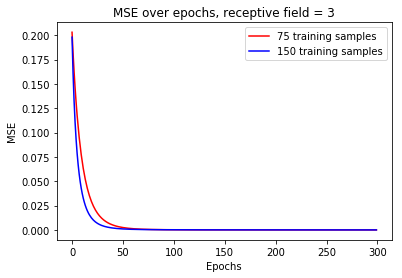

In [27]:
%matplotlib inline
fig_1 = plt.figure()
plt.plot(losses75,'r', label = '75 training samples')
plt.plot(losses150,'b', label = '150 training samples')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE over epochs, receptive field = 3')
plt.legend()
plt.savefig('MSE field 3.png', bbox_inches = 'tight')
plt.show()

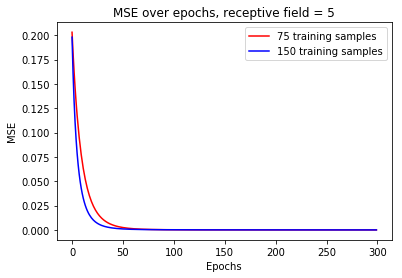

In [28]:
%matplotlib inline
plt.figure()
plt.plot(losses75,'r', label = '75 training samples')
plt.plot(losses150,'b', label = '150 training samples')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE over epochs, receptive field = 5')
plt.legend()
plt.savefig('MSE field 5.png', bbox_inches = 'tight')
plt.show()

In [29]:
with open('weights-150-receptive_field_5.npy', 'wb') as file:
    np.save(file, weights)

In [30]:
loaded_weights = np.load('weights-150-receptive_field_5.npy')

In [31]:
(loaded_weights == weights).all()

True

In [32]:
x = X_train150[3]
def forward_pass(x):
    x = np.floor(x*resolution).astype(int)

    y1_bot = np.max([x[0]-np.floor(field_size/2), 0]).astype(int)
    y1_top = np.min([x[0]+np.floor(field_size/2),49]).astype(int)
    y2_bot = np.max([x[1]-np.floor(field_size/2),0]).astype(int)
    y2_top = np.min([x[1]+np.floor(field_size/2),49]).astype(int)

    output1 = np.sum(weights[y1_bot:y1_top, y2_bot:y2_top, 0])
    output2 = np.sum(weights[y1_bot:y1_top, y2_bot:y2_top, 1])

    output = np.array([output1, output2])
    return output

In [33]:
print("Prediction:", forward_pass(X_train150[3]))
print("Original values:", Y_train150[3])

('Prediction:', array([0.47019794, 0.14896419]))
('Original values:', array([0.47131653, 0.14934634]))


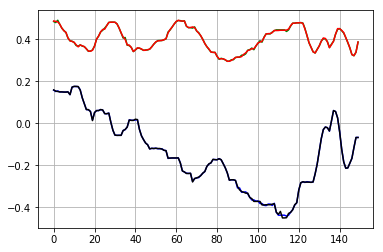

In [34]:
%matplotlib inline
x = np.arange(0,150,1)

fig, ax = plt.subplots()
list_first_elements = []
list_second_elements = []

for i in range(150):

    list_first_elements.append(forward_pass(X_train150[i])[0])
    list_second_elements.append(forward_pass(X_train150[i])[1])

    
ax.plot(x, list_first_elements, 'g')
ax.plot(x, Y_train150[:,0], 'r')
ax.plot(x, list_second_elements, 'b')
ax.plot(x, Y_train150[:,1], 'black')

ax.grid()
plt.show()